# Load Libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline

import h5py
import cv2
from random import randint #to generate random numbers

# Flip Them

We will flip the original images of 00.Preprocessing-ResNet dataset which are train1, train2, train3, train4 and name them train5, train6, train7,train8 respectively.


In [2]:
details = {}

details['hdf5_dataset_label'] = ['batch', 'label', 'hotlabel', 'img_name']
details['read_path'] = 'read/it/from/this/path/'
details['save_path'] = 'save/to/this/path/'
details['save_img_size'] = (300, 300, 3)

details['image_path'] = ['VW-Passat', 'RENO-Fluence', 'FIAT-Linea', 'VW-Polo',\
                              'RENO-Toros', 'FIAT-Dogan', 'OtherClass']
details['image_label'] = ['passat', 'fluence', 'linea', 'polo', 'toros', 'dogan', 'other']

details['class_number'] = len(details['image_path'])

orig_list = ['read/it/from/this/path/train1.hdf5', 
             'read/it/from/this/path/train2.hdf5',
             'read/it/from/this/path/train3.hdf5', 
             'read/it/from/this/path/train4.hdf5']

save_list = ['save/it/to/this/path/train5.hdf5', 
             'save/it/to/this/path/train6.hdf5',
             'save/it/to/this/path/train7.hdf5', 
             'save/it/to/this/path/train8.hdf5']

details['path'] = list(zip(orig_list, save_list))


In [3]:
def flip_img(details):
    
    for k in range(len(details['path'])):
    
        with h5py.File(details['path'][k][0],'r') as train_dataset:

            X_train = np.array(train_dataset[details['hdf5_dataset_label'][0]][:])
            #Y_label_train = np.array(train_dataset[details['hdf5_dataset_label'][1]][:])
            Y_hot_label_train = np.array(train_dataset[details['hdf5_dataset_label'][2]][:])
            img_name = np.array(train_dataset[details['hdf5_dataset_label'][3]][:])

            with h5py.File(details['path'][k][1],'w') as hdf5_file:

                data_shape = (len(Y_hot_label_train), details['save_img_size'][0], \
                              details['save_img_size'][1], details['save_img_size'][2])              
                hdf5_file.create_dataset(details['hdf5_dataset_label'][0], data_shape, np.float32)
                
                #hdf5_file.create_dataset(details['hdf5_dataset_label'][1], (len(Y_label_train), ), np.uint8)
                #hdf5_file[details['hdf5_dataset_label'][1]][...] = Y_label_train

                hdf5_file.create_dataset(details['hdf5_dataset_label'][2], (len(Y_hot_label_train), details['class_number']), np.uint8)
                hdf5_file[details['hdf5_dataset_label'][2]][...] = Y_hot_label_train
                
                dt = h5py.special_dtype(vlen=str)
                hdf5_file.create_dataset(details['hdf5_dataset_label'][3], (len(img_name), ), dtype=dt)
                hdf5_file[details['hdf5_dataset_label'][3]][...] = img_name

                for index, img in enumerate(X_train):
                    new_img = img.copy()
                    #print(new_img.shape)
                    flip_img = cv2.flip(new_img, 1)
                    hdf5_file[details['hdf5_dataset_label'][0]][index, ...] = flip_img[None]    

In [4]:
flip_img(details)

# TEST

In [5]:
def show_test(details):
     
    random_path = randint(0, len(details['path']) - 1 )
    
    with h5py.File(details['path'][random_path][0],'r') as hdf5_file:
        # open the hdf5 file
        # Total number of samples
        X_train = hdf5_file[details['hdf5_dataset_label'][0]]
        #Y_label_train = hdf5_file[details['hdf5_dataset_label'][1]]
        Y_hot_label_train = hdf5_file[details['hdf5_dataset_label'][2]]
        img_name = hdf5_file[details['hdf5_dataset_label'][3]]

        random_index = randint(0,len(Y_hot_label_train))
        img = X_train[random_index]
        print('Image name : ' + str(img_name[random_index]))
        print('Length : ' + str(len(X_train)))
        plt.imshow(img)
        plt.show()

        print('Hot label : ' + str(Y_hot_label_train[random_index]))
        print('Label index : ' + str(np.argmax(Y_hot_label_train[random_index])))
        print('Label class : ' + image_label[np.argmax(Y_hot_label_train[random_index])])
        
        print(img)
        
    with h5py.File(details['path'][random_path][1],'r') as hdf5_file:
        # open the hdf5 file
        # Total number of samples
        X_train = hdf5_file[details['hdf5_dataset_label'][0]]
        #Y_label_train = hdf5_file[details['hdf5_dataset_label'][1]]
        Y_hot_label_train = hdf5_file[details['hdf5_dataset_label'][2]]
        img_name = hdf5_file[details['hdf5_dataset_label'][3]]

        img = X_train[random_index]
        print('Image name : ' + str(img_name[random_index]))
        print('Length : ' + str(len(X_train)))
        plt.imshow(img)
        plt.show()

        print('Hot label : ' + str(Y_hot_label_train[random_index]))
        print('Label index : ' + str(np.argmax(Y_hot_label_train[random_index])))
        print('Label class : ' + image_label[np.argmax(Y_hot_label_train[random_index])])
        
        print(img)

Image name : b'toros0287.jpg'
Length : 5754


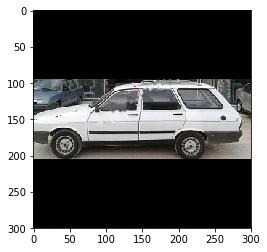

Hot label : [0 0 0 0 1 0 0]
Label index : 4
Label class : toros
[[[ 0.00392157  0.00392157  0.00392157]
  [ 0.          0.          0.00392157]
  [ 0.          0.          0.00392157]
  ..., 
  [ 0.          0.          0.00392157]
  [ 0.00392157  0.00392157  0.00784314]
  [ 0.          0.          0.        ]]

 [[ 0.          0.          0.        ]
  [ 0.00392157  0.          0.00392157]
  [ 0.          0.00784314  0.        ]
  ..., 
  [ 0.          0.          0.00392157]
  [ 0.          0.00392157  0.        ]
  [ 0.00392157  0.00392157  0.00784314]]

 [[ 0.          0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.00392157  0.          0.        ]
  ..., 
  [ 0.00392157  0.          0.        ]
  [ 0.          0.00392157  0.00392157]
  [ 0.          0.          0.        ]]

 ..., 
 [[ 0.00392157  0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.00784314]
  ..., 
  [ 0.          0.          0.00392157]
  [ 0.     

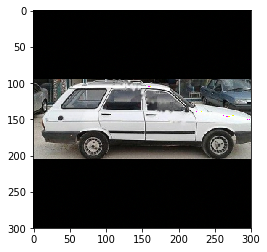

Hot label : [0 0 0 0 1 0 0]
Label index : 4
Label class : toros
[[[ 0.          0.          0.        ]
  [ 0.00392157  0.00392157  0.00784314]
  [ 0.          0.          0.00392157]
  ..., 
  [ 0.          0.          0.00392157]
  [ 0.          0.          0.00392157]
  [ 0.00392157  0.00392157  0.00392157]]

 [[ 0.00392157  0.00392157  0.00784314]
  [ 0.          0.00392157  0.        ]
  [ 0.          0.          0.00392157]
  ..., 
  [ 0.          0.00784314  0.        ]
  [ 0.00392157  0.          0.00392157]
  [ 0.          0.          0.        ]]

 [[ 0.          0.          0.        ]
  [ 0.          0.00392157  0.00392157]
  [ 0.00392157  0.          0.        ]
  ..., 
  [ 0.00392157  0.          0.        ]
  [ 0.          0.          0.        ]
  [ 0.          0.          0.        ]]

 ..., 
 [[ 0.          0.          0.        ]
  [ 0.          0.          0.00392157]
  [ 0.          0.          0.00392157]
  ..., 
  [ 0.          0.          0.00784314]
  [ 0.     

In [6]:
show_test(details)